In [90]:
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

import F21Stats as f21stats

import importlib

importlib.reload(f21stats)

<module 'F21Stats' from '/Users/meghapatil/Documents/Sameer/Physics/girish-kulkarni/Code/21cm-forest/code/F21Stats.py'>

In [91]:
import numpy as np
from scipy.fft import fft, ifft

def bispectrum(x, nfft=None):
    """
    Compute the bispectrum of a 1D signal.

    Parameters:
        x: The input signal.
        nfft: The number of FFT points to use (optional).

    Returns:
        B: The bispectrum.
    """

    if nfft is None:
        nfft = len(x)
    
    k = np.fft.fftfreq(nfft)

    X = fft(x, nfft)

    bandwidth = nfft//2-1
    B = np.zeros((bandwidth), dtype=np.float32)

    for k1 in range(1,bandwidth+1):
            B[k1-1] = np.abs(X[k1] * X[k1] * np.conj(X[2*k1]).real)

    return k[1:bandwidth+1], B

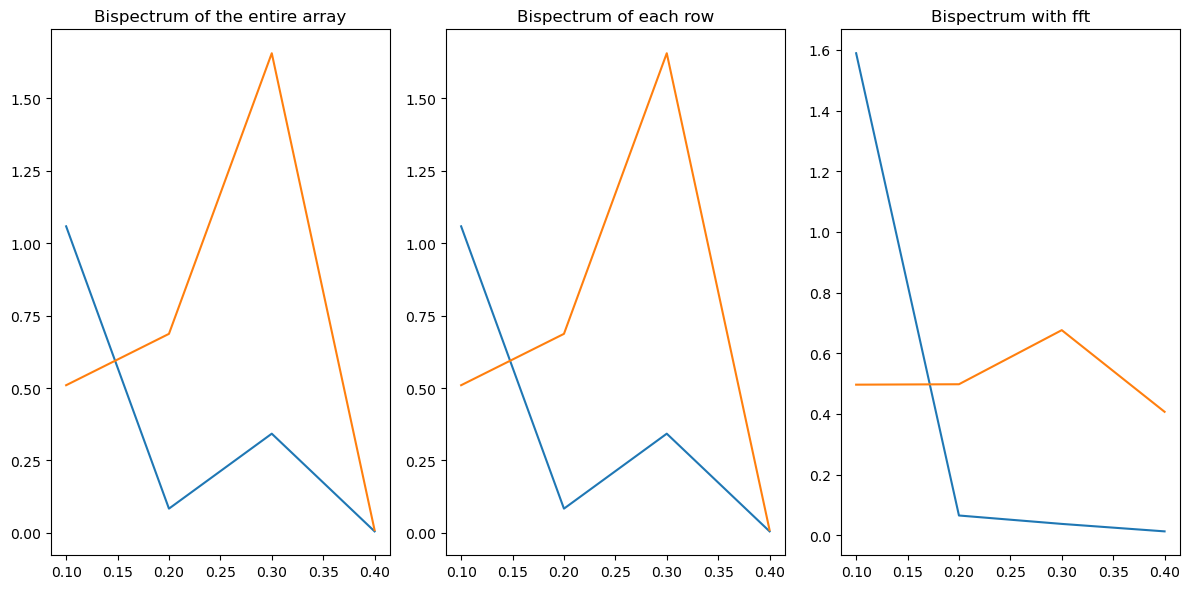

In [92]:
random_array = np.random.rand(2,10)  

# ... existing code ...

# Call compute_1d_bispectrum for the entire random array
ks, bs = f21stats.F21Stats.compute_1d_bispectrum(random_array)
ksf, bsf = f21stats.F21Stats.compute_1d_bispectrum_fft(random_array)

# Call compute_1d_bispectrum_single for each row in the array
#random_array = random_array.reshape(1, 10)
bispectrum_single_results = [f21stats.F21Stats.compute_1d_bispectrum_single(row) for row in random_array]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Bispectrum of the entire array')
for (bs_row) in bs:
    plt.plot(ks, bs_row)

plt.subplot(1, 3, 2)
plt.title('Bispectrum of each row')
for (ks1, bs1) in bispectrum_single_results:
    plt.plot(ks1, bs1)

plt.subplot(1, 3, 3)
plt.title('Bispectrum with fft')
for (bs_row) in bsf:
    plt.plot(ksf, bs_row)
plt.tight_layout()
plt.show()


In [119]:
def compute_1d_trispectrum(signal):
    # Perform the FFT using NumPy
    if signal.ndim == 1: signal = signal.reshape(1, len(signal))# return F21Stats.compute_1d_bispectrum_single(signal)
    n_pixels = len(signal[0])
    delta_k = np.fft.fft(signal, axis=1)
    num_bins = n_pixels//2+1
    k = np.fft.fftfreq(len(signal[0]))

    # Compute trispectrum for k1 = k2 = k3
    trispectrum = np.zeros((signal.shape[0],num_bins))
    for i,k1 in enumerate(k[:num_bins]):
        # Find the closest indices for k1 and -3k1
        k1_idx = np.argmin(np.abs(k - k1), axis=0)
        k4_idx = np.argmin(np.abs(k + 3 * k1), axis=0)

        # Trispectrum T(k1, k1, k1, -3k1)
        trispectrum[:,i] = (delta_k[:,k1_idx] * delta_k[:,k1_idx] * delta_k[:,k1_idx] * np.conj(delta_k[:,k4_idx])).real

    return k[1:num_bins-1], trispectrum[:,1:num_bins-1]


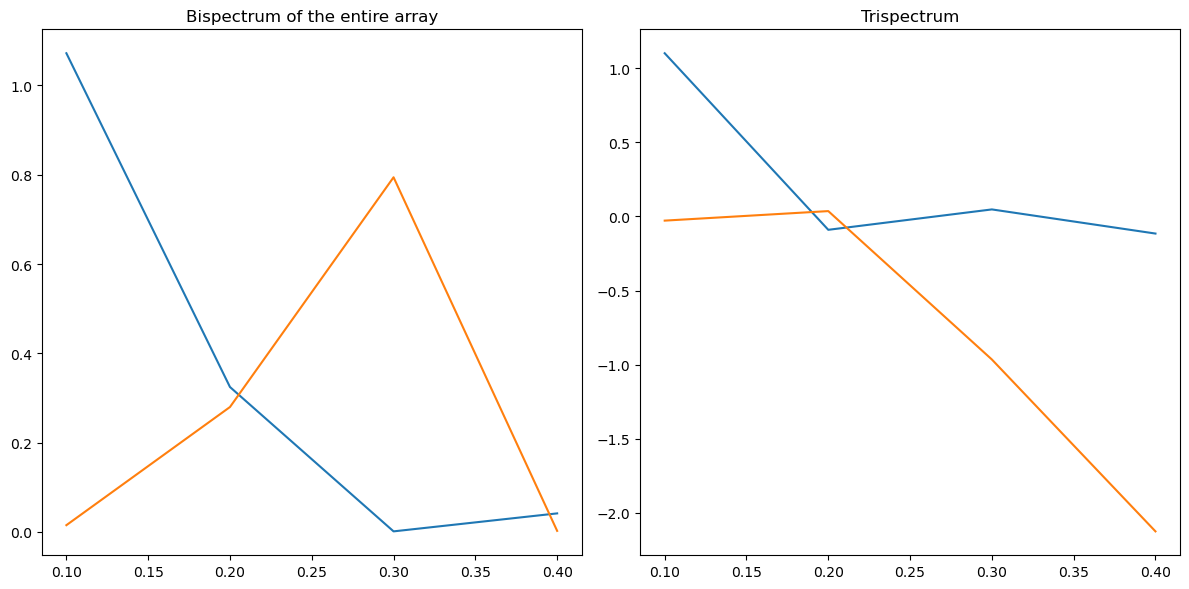

In [120]:
random_array = np.random.rand(2,10)  

# ... existing code ...

# Call compute_1d_bispectrum for the entire random array
ks, bs = f21stats.F21Stats.compute_1d_bispectrum(random_array)
ksf, bsf = compute_1d_trispectrum(random_array)

# Call compute_1d_bispectrum_single for each row in the array
#random_array = random_array.reshape(1, 10)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Bispectrum of the entire array')
for (bs_row) in bs:
    plt.plot(ks, bs_row)


plt.subplot(1, 2, 2)
plt.title('Trispectrum')
for (bs_row) in bsf:
    plt.plot(ksf, bs_row)
plt.tight_layout()
plt.show()
